In [40]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

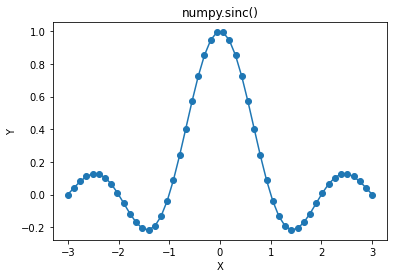

array([ 3.89817183e-17,  4.15114091e-02,  8.03754744e-02,  1.10560173e-01,
        1.26741226e-01,  1.25106539e-01,  1.04020292e-01,  6.44510924e-02,
        1.00940913e-02, -5.28473225e-02, -1.16213079e-01, -1.70721641e-01,
       -2.07001488e-01, -2.16703178e-01, -1.93561426e-01, -1.34277406e-01,
       -3.91083073e-02,  8.79177183e-02,  2.39201032e-01,  4.04176345e-01,
        5.70268753e-01,  7.24101450e-01,  8.52825194e-01,  9.45423163e-01,
        9.93845462e-01,  9.93845462e-01,  9.45423163e-01,  8.52825194e-01,
        7.24101450e-01,  5.70268753e-01,  4.04176345e-01,  2.39201032e-01,
        8.79177183e-02, -3.91083073e-02, -1.34277406e-01, -1.93561426e-01,
       -2.16703178e-01, -2.07001488e-01, -1.70721641e-01, -1.16213079e-01,
       -5.28473225e-02,  1.00940913e-02,  6.44510924e-02,  1.04020292e-01,
        1.25106539e-01,  1.26741226e-01,  1.10560173e-01,  8.03754744e-02,
        4.15114091e-02,  3.89817183e-17])

In [51]:
data = np.linspace(-3, 3, 50) 
points = np.sinc(data) 
  

#numpy.sinc() plot
plt.plot(data, points, marker = "o") 
plt.title("numpy.sinc()") 
plt.xlabel("X") 
plt.ylabel("Y") 
  
plt.show() 


points

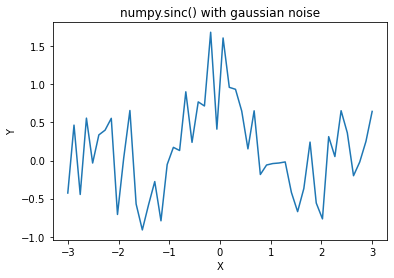

array([-0.42616901,  0.4646717 , -0.44503086,  0.55631563, -0.0326172 ,
        0.33620361,  0.3984216 ,  0.55370543, -0.70735723,  0.0311294 ,
        0.65625768, -0.56983754, -0.91003674, -0.5806871 , -0.27576874,
       -0.79061849, -0.05219978,  0.17301059,  0.13171716,  0.90165051,
        0.23869381,  0.76932695,  0.71572985,  1.68291023,  0.41185504,
        1.60771065,  0.96028486,  0.93447953,  0.64954832,  0.15320293,
        0.65230594, -0.1830129 , -0.05866746, -0.03944968, -0.03236958,
       -0.01816659, -0.41847185, -0.67029298, -0.36719153,  0.24192754,
       -0.55718943, -0.76512233,  0.31341439,  0.05240215,  0.65364662,
        0.36372656, -0.19917047, -0.01906918,  0.25104291,  0.64458505])

In [34]:
#generating Gausian noise

noise = np.random.normal(0,0.5,50)

#adding noise to the signal
noisyPoints = points+noise

#plot of the signal with gaussian function
plt.plot(data,noisyPoints) 
plt.title("numpy.sinc() with gaussian noise") 
plt.xlabel("X")  
plt.ylabel("Y") 
  
plt.show() 



noisyPoints

In [99]:
#train the data with svm

X_train, X_test, y_train, y_test = train_test_split(noisyPoints, points, test_size = 0.2)

model = SVR(kernel = 'rbf', C = 5, epsilon = .05)

model.fit(X_train.reshape(-1,1) ,y_train.reshape(-1,1))

pred = model.predict(X_test.reshape(-1,1))

/Users/coltonproctor/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [100]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred})
df

,Real Values,Predicted Values
0,9.454232e-01,0.847420
1,-1.342774e-01,0.054699
2,7.241014e-01,0.432614
3,3.898172e-17,-0.137412
4,-1.707216e-01,-0.165003
5,1.267412e-01,0.100403
6,-5.284732e-02,0.090655
7,1.251065e-01,0.107936
8,1.009409e-02,-0.180196
9,1.009409e-02,-0.179563


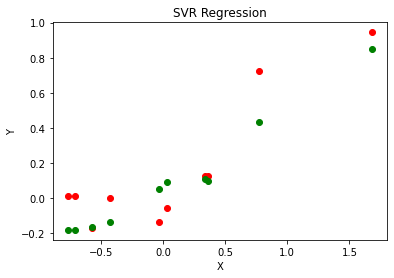

In [101]:
X_grid = np.arange(min(noisyPoints), max(noisyPoints), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Discussion of SVM Parameters     

The optional parameters for the SVM algorithm are the kernel, C, and epsilon. The choice of kernel is a major 
decision and the choices are Linear, Sigmoid, RBF, Poly, or Precomputed. For my application I chose to use the default kernel which is RBF. This is because the underlying data that I am using is not linear in nature due to the structure of the sinc function. The RBF kernel imposes onto the data a non-linear structure which accounts for the sinc function. 

The second parameter that can be adjusted is C, which defines the tradeoff for classification error over maximizing the decision functions margin. I found that as I increased C the classifications became more accurate. At C = 1 the default the classifications were wildly incorrect. At C = 5 I reached good accuracy without risk of overfitting too closely. At C = 10 the predictions were even more accurate, but I risked overfitting. In the end I chose to use a C of 5 as a good tradeoff for accuracy and maximizing the margin.

The final term is epsilon, which is the error term that allows for no penalty when predictions fall within epsilon of the correct value. I found that halving the initial value from .1 to .05 increased the accuracy of the model. Any further adjustments lower didn't have any effect, and raising the epsilon caused the predictions to fall in a straight line toward the center of the graph. The higher the epsilon became the more inaccurate the predictions ended up being. 

Overall, the regressor is not very accurate. I wouldn't use it to approximate the sinc function, as it gets the gerneral shape but with the noise it has a hard time predicting correctly. Only a few of the values that were predicted in the test set were actually very close to their true value. With more training data I do think that the underlying structure of the sinc function could more closely be approximated with this type of model. 

Regarding the findings in the signal theory approach to support vector learning classification the model could be improved by choosing better parameters for its creation. As stated in the beginning of the article the strength and downfall of SVM models is that they are highly customizable through use of their parameters. Even though you see improvements while adjusting the parameters there is no way to know for sure if the model you are using is optimal or not. 
The only way to know is to create an unreasonable number of models and test their proficiency against one another. That isn’t really feasible in the way I have it implemented; it would require much more automation. Guiding the choice of the parameters however would reduce that search space and make it so that it would be possible to test a smaller range of parameters against one another.
In the article it states that you can use the sinc function itself to find the optimal parameters. You choose the maxima in the function and utilize them while also utilizing sinc as a kernel function as well. Changing the parameters of the SVM function to fit closely to the underlying structure of your data helps in its accuracy. Therefore I think that using a different kernel, such as the sinc kernel, and guiding the optimization of its parameters would assist in creating a much more accurate model. 
